In [16]:
from scipy import io
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np


In [32]:
mat_file = io.loadmat('/home/ubuntu/문서/AY_ust/preprocessing/Land_mask/Land_mask.mat')
mask = mat_file['Land']

(-0.5, 10499.5, 7999.5, -0.5)

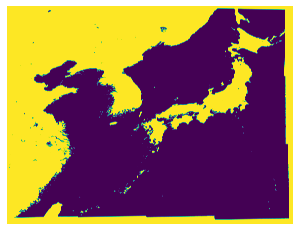

In [45]:
plt.imshow(mask)
plt.axis(False)

In [78]:
image_size = mask.shape
patch_size = 256

In [149]:
image_height, image_width = mask.shape[0], mask.shape[1]

num_patches_x = image_width // 256
num_patches_y = image_height // 256

# 패치들을 저장할 NumPy 배열을 초기화합니다. 패치의 개수와 크기에 맞춰 배열의 크기를 설정합니다.
# 이미지가 컬러라면 3차원, 흑백이라면 2차원일 것입니다. 여기서는 컬러 이미지를 가정합니다.
patches = np.empty((num_patches_y * num_patches_x, 256, 256), dtype=mask.dtype)

# 각 패치를 추출하여 NumPy 배열에 추가합니다.
for i in range(num_patches_y):
    for j in range(num_patches_x):
        # 패치의 시작점을 계산합니다.
        start_x = j * 256
        start_y = i * 256
        # NumPy 배열의 인덱스를 계산합니다.
        index = i * num_patches_x + j
        # 이미지에서 해당 패치를 추출하고 배열에 저장합니다.
        patches[index] = mask[start_y:start_y + 256, start_x:start_x + 256]

# NumPy 배열에 담긴 패치들의 정보를 확인합니다.
patches.shape


(1271, 256, 256)

(array([652.,  29.,  29.,  24.,  21.,  27.,  22.,  31.,  34., 402.]),
 array([    0. ,  6553.6, 13107.2, 19660.8, 26214.4, 32768. , 39321.6,
        45875.2, 52428.8, 58982.4, 65536. ]),
 <BarContainer object of 10 artists>)

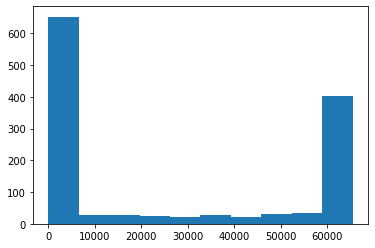

In [150]:
patch_sums = patches_array.reshape(num_patches_y * num_patches_x, -1).sum(axis=1)
plt.hist(patch_sums)

In [151]:
ocean_index = np.where(patch_sums==0)[0]
ocean_index

array([  71,   72,   76,   77,   78,   79,  111,  112,  113,  117,  118,
        119,  120,  151,  152,  153,  154,  158,  159,  160,  161,  191,
        192,  193,  194,  195,  231,  232,  233,  234,  235,  267,  268,
        269,  270,  271,  272,  273,  274,  275,  276,  283,  284,  307,
        308,  309,  310,  311,  312,  313,  314,  315,  316,  317,  322,
        323,  324,  325,  347,  348,  349,  350,  351,  352,  353,  354,
        355,  356,  357,  358,  359,  363,  364,  365,  366,  376,  387,
        388,  389,  390,  391,  392,  393,  394,  395,  396,  397,  398,
        399,  400,  405,  406,  407,  416,  420,  421,  429,  430,  431,
        432,  433,  434,  435,  436,  437,  438,  439,  446,  447,  448,
        462,  471,  474,  475,  476,  477,  478,  486,  487,  488,  489,
        503,  504,  512,  513,  514,  515,  516,  517,  518,  519,  527,
        528,  529,  530,  542,  543,  544,  545,  546,  553,  554,  555,
        556,  558,  568,  569,  570,  571,  581,  5

# 패치 시각화

<Figure size 96000x64000 with 0 Axes>

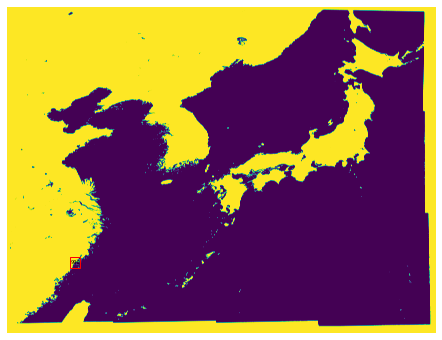

In [157]:
import matplotlib.patches as patches

height, width = mask.shape[:2]
plt.figure(figsize=(120,80), dpi=800)
# 플롯을 생성합니다.
fig, ax = plt.subplots(figsize=(8, 6))
# 이미지를 플롯에 렌더링합니다.
ax.imshow(mask)

# 패치 인덱스를 표시합니다.
for i in range(height // 256):
    for j in range(width // 256):
        # 각 패치의 중심 좌표를 계산합니다.
        center_x, center_y = j * 256 + 128, i * 256 + 128
        # 인덱스를 계산합니다 (0부터 시작).
        index = i * (width // 256) + j
#         print(index)
        # 인덱스 텍스트를 이미지에 추가합니다.
        if index==990:
            ax.text(center_x, center_y, str(index), color='black', ha='center', va='center', fontsize=5)
            # 패치의 테두리를 그립니다.
            rect = patches.Rectangle((j*256, i*256), 256, 256, linewidth=1, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

# 축을 숨깁니다.
plt.axis('off')
plt.show()


<Figure size 96000x64000 with 0 Axes>

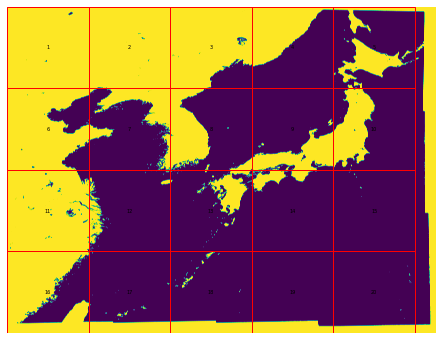

In [67]:
import matplotlib.patches as patches

height, width = mask.shape[:2]
plt.figure(figsize=(120,80), dpi=800)
# 플롯을 생성합니다.
fig, ax = plt.subplots(figsize=(8, 6))
# 이미지를 플롯에 렌더링합니다.
ax.imshow(mask)

# 패치 인덱스를 표시합니다.
for i in range(height // 2000):
    for j in range(width // 2000):
        # 각 패치의 중심 좌표를 계산합니다.
        center_x, center_y = j * 2000 + 1000, i * 2000 + 1000
        # 인덱스를 계산합니다 (1부터 시작).
        index = i * (width // 2000) + j + 1
#         print(index)
        # 인덱스 텍스트를 이미지에 추가합니다.
        ax.text(center_x, center_y, str(index), color='black', ha='center', va='center', fontsize=5)
        # 패치의 테두리를 그립니다.
        rect = patches.Rectangle((j*2000, i*2000), 2000, 2000, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

# 축을 숨깁니다.
plt.axis('off')
plt.show()


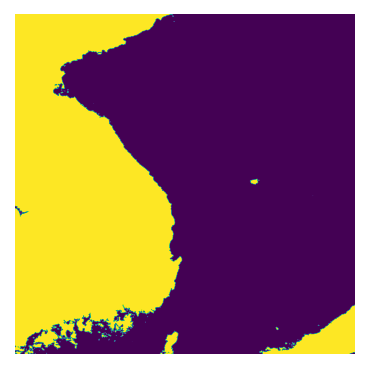

In [77]:
# 이미지의 높이와 너비를 구합니다.
image_height, image_width = mask.shape[0], mask.shape[1]

# 패치의 수를 계산합니다.
num_patches_x = image_width // 2000
num_patches_y = image_height // 2000

# 344번째 패치에 해당하는 좌표를 계산합니다.
# 인덱스는 1부터 시작하므로, 배열 인덱싱을 위해 1을 빼줍니다.
patch_idx = 7
patch_x = (patch_idx % num_patches_x) * 2000
patch_y = (patch_idx // num_patches_x) * 2000

# 해당 패치를 이미지에서 크롭합니다.
patch_image = mask[patch_y:patch_y + 2000, patch_x:patch_x + 2000]

# 패치를 시각화합니다.
plt.figure(figsize=(3, 3), dpi=150)
plt.imshow(patch_image)
plt.axis('off')  # 축 표시 제거
plt.show()


In [160]:
np.load(save_file)

array([  71,   72,   76,   77,   78,   79,  111,  112,  113,  117,  118,
        119,  120,  151,  152,  153,  154,  158,  159,  160,  161,  191,
        192,  193,  194,  195,  231,  232,  233,  234,  235,  267,  268,
        269,  270,  271,  272,  273,  274,  275,  276,  283,  284,  307,
        308,  309,  310,  311,  312,  313,  314,  315,  316,  317,  322,
        323,  324,  325,  347,  348,  349,  350,  351,  352,  353,  354,
        355,  356,  357,  358,  359,  363,  364,  365,  366,  376,  387,
        388,  389,  390,  391,  392,  393,  394,  395,  396,  397,  398,
        399,  400,  405,  406,  407,  416,  420,  421,  429,  430,  431,
        432,  433,  434,  435,  436,  437,  438,  439,  446,  447,  448,
        462,  471,  474,  475,  476,  477,  478,  486,  487,  488,  489,
        503,  504,  512,  513,  514,  515,  516,  517,  518,  519,  527,
        528,  529,  530,  542,  543,  544,  545,  546,  553,  554,  555,
        556,  558,  568,  569,  570,  571,  581,  5